<a href="https://colab.research.google.com/github/Lingo1101/ML-fll-with-python/blob/master/dog_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
#下载数据集
!pip3 install kaggle
!kaggle
!echo "{\"username\":\"dutianze\",\"key\":\"b9533426d651bfef4208069a43f9edc7\"}" > /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats  # 这句话是复制的 只是加了！

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.0MB/s]
 96% 261M/271M [00:03<00:00, 82.9MB/s]
100% 271M/271M [00:03<00:00, 83.1MB/s]
 99% 537M/543M [00:05<00:00, 82.4MB/s]
100% 543M/543M [00:05<00:00, 95.1MB/s]


In [0]:
!apt-get install zip
!unzip ./train.zip
!unzip ./test1.zip

In [0]:
!ls ./train

In [0]:
import os,shutil
#原始数据解压目录的路径
original_datasets_dir = './train'   #阻止反斜杠转义
#保存较小数据集的目录
base_dir = './cats_and_dogs_small'
os.mkdir(base_dir)   #创建一个名为cats_and_dogs_small的文件夹.默认的 mode 是 0777 (八进制)。

#分别对应划分后的训练、验证和测试的目录 即在创建好的文件夹里面再创建训练、验证、测试子文件夹
train_dir = os.path.join(base_dir,'train') #将目录和文件名合并成一个路径
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

#猫狗的训练目录 即在训练目录中创建猫、狗类的子文件夹
train_cats_dir = os.path.join(train_dir,'cats') 
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

#猫狗的验证目录
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

#猫狗的测试目录
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

#将前1000张猫图像复制到Train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    scr = os.path.join(original_datasets_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(scr,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    scr =os.path.join(original_datasets_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(scr,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    scr = os.path.join(original_datasets_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(scr,dst)   #copyfile(1,2)把1复制到2中
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    scr = os.path.join(original_datasets_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(scr,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    scr = os.path.join(original_datasets_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(scr,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    scr= os.path.join(original_datasets_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(scr,dst)

In [0]:
print('training cats:',len(os.listdir(train_cats_dir)))

print('validation dogs:',len(os.listdir(validation_dogs_dir)))

print('test cats:',len(os.listdir(test_cats_dir)))

training cats: 1000
validation dogs: 500
test cats: 500


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  #图片大小150*150，3表示彩色图像
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#将所有图像除以255缩放到[0-1]
train_datagen = ImageDataGenerator(rescale=1./255)    #datagen数据发生器
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(      #数据集生成器
    train_dir,    #目标目录
    target_size=(150,150),   #将所有图像的大小调整为150*150
    batch_size=20,   #批处理数据的大小
    class_mode='binary')   #因为使用了binary_crossetropy损失，所以需要二进制标签 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break    #阻止生成器不停地生成这些批量，阻止循环目标文件夹中的图像

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [2]:
history = model.fit_generator(
    train_generator,  #生成器，可不停生成输入和目标组成的批量                            
    steps_per_epoch=100,  #由于不停生成，故需知道每轮从生成器中抽取100个样本(运行100次梯度下降)                            
    epochs=20,                             
    validation_data=validation_generator,                            
    validation_steps=50)   #从验证生成器中抽取50个批次用于评估

NameError: ignored

In [0]:
model.save('cats_dogs_small_1.h5')

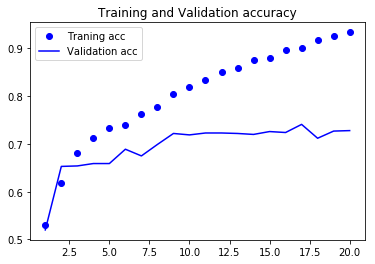

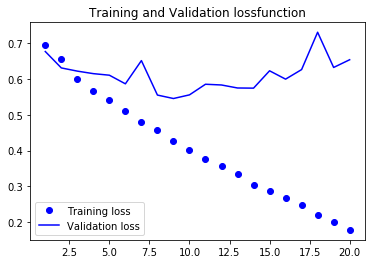

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) +1)  #

plt.plot(epochs,acc,'bo',label='Traning acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure() #创建新的图形

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation lossfunction')
plt.legend()

plt.show()

In [0]:
#数据增强

datagen=TmageDataGenerator(rotation_range=40,  #角度值，(0-180)图像随机旋转的的角度范围
                           width_shift_range=0.2,  #图像在水平或垂直方向上平移的范围
                           heigth_shift_range=0.2,
                           shear_range=0.2,  #随机错切变换的角度
                           zoom_range=0.2,   #随机缩放的范围
                           horizontal_flip=True,  #随即将一半图像水平翻转
                           fill_mode='nearest')  #用于填充新创建像素的方法，新像素可能来自旋转等
  
#显示几个随机增强后的训练图像
from keras.preprocessing import image   #导入图像预处理工具模块

fnames = [os.path.join(train_cats_dir,fname) for fname in os,listdir(train_cats_dir)]

img_path = fname[3]  #选一张图像进行增强

img = image.load_img(img_path,target_size=(150,150)) #读取图像并调整大小

x = image.img_to_array(img) #将其转换为形状（150,150,3）的numpy数组

x = x.reshape((1,) + x.shape)  #将其形状改变为（1,150,150,3）

#生成随机变换后的图像批量，循环是无限需break
i=0
for batch in datagen.flow(x,batch_size=1):       
    plt.figure(i)
    imgplot = plt.imshow(image,array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break
        
plt.show()

SyntaxError: ignored

In [0]:
定义一个包含dropout的CNN
add(layers.Dropout(0.5))